# Skin Conditions Model
This model is the model that used to classify user's skin conditions and have an output of multi-label class from 3 possible class (acne, eye_bag,redness)

In [51]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

In [4]:
# Memanggil file env
from dotenv import load_dotenv
load_dotenv()
datasets_path = os.getenv('DATASETS_PATH_ALL')

In [19]:
# Memuat model MobileNetV2 dengan bobot ImageNet tanpa lapisan atas (top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

## Import Dataset

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import os
from sklearn.model_selection import train_test_split

class SkinConditionDataset(tfds.core.GeneratorBasedBuilder):
    """DatasetBuilder for skin condition detection."""

    VERSION = tfds.core.Version('1.0.0')
    MANUAL_DOWNLOAD_INSTRUCTIONS = "Please ensure the dataset is downloaded and located at 'D:/College/Semester 5/MSIB/Capstone Project/datasets/allDatasets'."

    def _info(self):
        return tfds.core.DatasetInfo(
            builder=self,
            description=("Dataset untuk deteksi kondisi kulit seperti kulit kering, normal, berminyak, berjerawat, dan merah."),
            features=tfds.features.FeaturesDict({
                'image': tfds.features.Image(shape=(224, 224, 3)),
                'label': tfds.features.Tensor(shape=(6,), dtype=tf.float32),
            }),
            supervised_keys=('image', 'label'),
        )

    def _split_generators(self, dl_manager):
        # Mengambil data dari path yang telah diinstruksikan
        path = dl_manager.manual_dir
        
        # Membaca semua gambar dan label
        all_data = []
        for category in ['acne', 'eye_bags', 'redness', 'dry', 'normal', 'oily']:
            category_path = os.path.join(path, category)
            for filename in os.listdir(category_path):
                all_data.append((filename, category))

        # Membuat DataFrame
        df = pd.DataFrame(all_data, columns=['filename', 'label'])

        # Membagi data menjadi train, val, dan test
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 dari train untuk validasi

        return {
            'train': self._generate_examples(train_df, path),
            'val': self._generate_examples(val_df, path),
            'test': self._generate_examples(test_df, path),
        }

    def _generate_examples(self, dataframe, base_path):
        """Yields examples."""
        label_map = {
            'acne': [1, 0, 0, 0, 0, 0],
            'eye_bags': [0, 1, 0, 0, 0, 0],
            'redness': [0, 0, 1, 0, 0, 0],
            'dry': [0, 0, 0, 1, 0, 0],
            'normal': [0, 0, 0, 0, 1, 0],
            'oily': [0, 0, 0, 0, 0, 1],
        }
        for _, row in dataframe.iterrows():
            image_path = os.path.join(base_path, row['label'], row['filename'])
            unique_key = f"{row['label']}_{row['filename']}"  # Membuat kunci unik
            print(f"Accessing: {image_path}")  # Debugging print statement
            label = label_map[row['label']]
            yield unique_key, {  # Menggunakan kunci unik
                'image': image_path,
                'label': label,
            }

datasets_path = "D:/College/Semester 5/MSIB/Capstone Project/datasets/allDatasets"
builder = SkinConditionDataset(data_dir=datasets_path)
builder.download_and_prepare()
ds_train = builder.as_dataset(split='train')
ds_val = builder.as_dataset(split='val')
ds_test = builder.as_dataset(split='test')

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_5e7f3a2b459834070ba1_jpg.rf.fadae8b8de3813faed74c92160d91497.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_30ed482de9cdef9fe257_jpg.rf.770d4fbbe8f198263ac570341d1453ba - Copy.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_9cac26f03e339f9ff695_jpg.rf.e3c5d1495adaf367546c4ebe649596c0.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_cd8a9c50a2856519fbf7_jpg.rf.bc0299c77c9e9890e229163d9c639a77.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_de89fc1ef64327a21705_jpg.rf.65d40ae84e4367a1f9b6f31b8681637b.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_c11e53c6e3595bfab5a7_jpg.rf.8f74c9a8f7aa40f1


Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_e207b4a04884a9d8b1e7_jpg.rf.81ae289494e3b8dc32cefda076b119e8.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_532565e3decafdfab48b_jpg.rf.081c7ff087ab8a2ee07b0ec07e4da181.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_e09ba2949f9d8669b48c_jpg.rf.05468a70e924ddd89775a5437adcc749.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_a9dbd078400fa00cae2a_jpg.rf.a5529ba0a9a9f7a31fec99bacd92e806.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_bf13648450f11b89968f_jpg.rf.509ef9806e4d19a3aa16503299d94e90.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_5a510955ceb3efb852fa_jpg.rf.764271331ea492fbbad87728da1cca

Generating splits...:  33%|███▎      | 1/3 [00:00<00:00,  2.46 splits/s]

Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_df6b42013b85662caba1_jpg.rf.0ea70bc9388d70b3d5d8cdc103067bd5.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_8a72f446127aa7964f7d_jpg.rf.a76937e4207deb6535f4050e683b8608 - Copy.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_7b4ef51d52fe7244b6ad_jpg.rf.99fa04aba16ee68527dc9d8510bbe4ea.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_f6ac3919d1bb9f0c0ba4_jpg.rf.d5bcba333e458d98ea25be99dba3ba1e.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_5f2fd3ae2522148d8668_jpg.rf.c15e3d88bddfb38575538baa9cdce360.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_3ad884c8f098a8aa9347_jpg.rf.213089a6f9e6

Generating splits...:  67%|██████▋   | 2/3 [00:00<00:00,  3.93 splits/s]

Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_ba1d4c45e8dd3d76c15d_jpg.rf.5203bf0762119ee6ed560abecffc1727.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\dry\dry_7554fdff421b3ef5515a_jpg.rf.2df1e9bb3ab06651a3d23fd32222ebc4.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_c8c9fab81a994515a15c_jpg.rf.a0435d858c5037752f2adbaaab7d3cc2.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_53fbe217eef0c414ee73_jpg.rf.8328c29b501d8cbeda7cb48cbe1a02d7.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_b72bc763f853e42ad6dd_jpg.rf.cf066ccbb570a91c28ecf2b386ea0c83.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_b16acca7010adc865e8c_jpg.rf.fbe6aea60a627cb

Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_cd8a9c50a2856519fbf7_jpg.rf.8644fe5116bc473db7e71de6f655d708.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_49ce286775959f8f4637_jpg.rf.fc0c88f8000c1151fa55da1910cae192.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_4e44fd089d5cb62f0655_jpg.rf.9ffcc277cb3c82e06e576fcb3d78deef - Copy.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_b2ec517844da2fc59e53_jpg.rf.8bf98933169033825480f006d5756d65.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\normal\normal_31749351fd7ddf1f1971_jpg.rf.195b210b01f0ce93547154917189d97b.jpg
Accessing: D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\downloads\manual\oily\oily_a9af7121519143fee832_jpg.rf.1d83cf

Dataset skin_condition_dataset downloaded and prepared to D:\College\Semester 5\MSIB\Capstone Project\datasets\allDatasets\skin_condition_dataset\1.0.0. Subsequent calls will reuse this data.


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

# Menambahkan lapisan kustom di atas MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dropout(0.2)(x) 
x = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x) 
outputs = Dense(6, activation='sigmoid',kernel_regularizer=l2(0.01))(x)  # Menggunakan sigmoid untuk multi-label classification

# Membuat model akhir
model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,           # Berhenti jika tidak ada peningkatan setelah 5 epoch
    restore_best_weights=True
)

In [54]:
# Memuat dataset yang sudah diproses
ds_train = tfds.load('skin_condition_dataset', split='train', data_dir=datasets_path)
ds_val = tfds.load('skin_condition_dataset', split='val', data_dir=datasets_path)
ds_test = tfds.load('skin_condition_dataset', split='test', data_dir=datasets_path)

In [45]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Fungsi untuk memastikan data tersusun sebagai pasangan (image, label)
def preprocess(data):
    image = data['image']
    label = data['label']
    return image, label

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)  # Preprocessing sesuai MobileNet
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

ds_train = ds_train.map(preprocess_image)
ds_val = ds_val.map(preprocess_image)
ds_test = ds_test.map(preprocess_image)

ds_train = ds_train.batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

In [46]:
for image, label in ds_train.take(1):
    print(image.shape, label.shape)  # Pastikan gambar memiliki shape (32, 224, 224, 3)

(32, 224, 224, 3) (32, 6)


In [ ]:
# # Fungsi untuk augmentasi data
# def augment(image, label):
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     image = tf.image.random_brightness(image, max_delta=0.3)
#     image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
#     return image, label

# # Menyiapkan dataset dengan augmentasi
# ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_train = ds_train.map(lambda image, label: augment(image, label), num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_train = ds_train.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_val = ds_val.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_test = ds_test.batch(32).prefetch(tf.data.experimental.AUTOTUNE)


In [38]:
# Membekukan semua lapisan dari model MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Mengompilasi model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.3962 - loss: 0.4493 - val_accuracy: 0.4475 - val_loss: 0.3531
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 316ms/step - accuracy: 0.5011 - loss: 0.3290 - val_accuracy: 0.4700 - val_loss: 0.3251
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - accuracy: 0.5576 - loss: 0.2943 - val_accuracy: 0.4925 - val_loss: 0.3216
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.6050 - loss: 0.2798 - val_accuracy: 0.5000 - val_loss: 0.3207
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 317ms/step - accuracy: 0.6435 - loss: 0.2676 - val_accuracy: 0.5125 - val_loss: 0.3197
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 316ms/step - accuracy: 0.6684 - loss: 0.2565 - val_accuracy: 0.5100 - val_loss: 0.3180
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 315ms/step - accuracy: 0.6895 - loss: 0.2458 - val_accuracy: 0.5150 - val_loss: 0.3167
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 316ms/step - accuracy: 0.7194 - loss: 0.2358 - val_accu

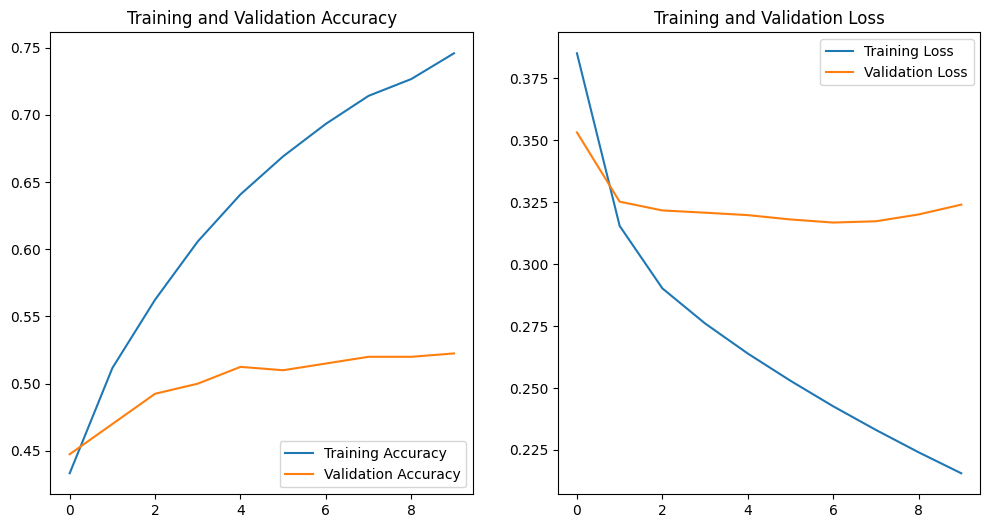

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.4482 - loss: 0.3459
Testing Loss: 0.35857272148132324, Testing Accuracy: 0.42250001430511475


In [ ]:
# Melatih model dan mencatat hasil pelatihan dalam objek `history`
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=20,
    callbacks=[early_stopping]
)

# Menampilkan metrik dengan matplotlib
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluasi model pada data testing
loss, accuracy = model.evaluate(ds_test)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')

In [ ]:
# Fine-tuning: Membuka beberapa lapisan terakhir dari MobileNetV2
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Mengompilasi ulang model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 367ms/step - accuracy: 0.5575 - loss: 0.3049 - val_accuracy: 0.5025 - val_loss: 0.3817
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 338ms/step - accuracy: 0.7172 - loss: 0.2301 - val_accuracy: 0.5000 - val_loss: 0.4112
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - accuracy: 0.8463 - loss: 0.1751 - val_accuracy: 0.5000 - val_loss: 0.4448
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.9308 - loss: 0.1279 - val_accuracy: 0.4925 - val_loss: 0.5006
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 529ms/step - accuracy: 0.9761 - loss: 0.0914 - val_accuracy: 0.4825 - val_loss: 0.5774
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.9926 - loss: 0.0656 - val_accuracy: 0.4850 - val_loss: 0.6538
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 470ms/step - accuracy: 0.9973 - loss: 0.0485 - val_accuracy: 0.4800 - val_loss: 0.7409
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step - accuracy: 0.9981 - loss: 0.0367 - val_accu

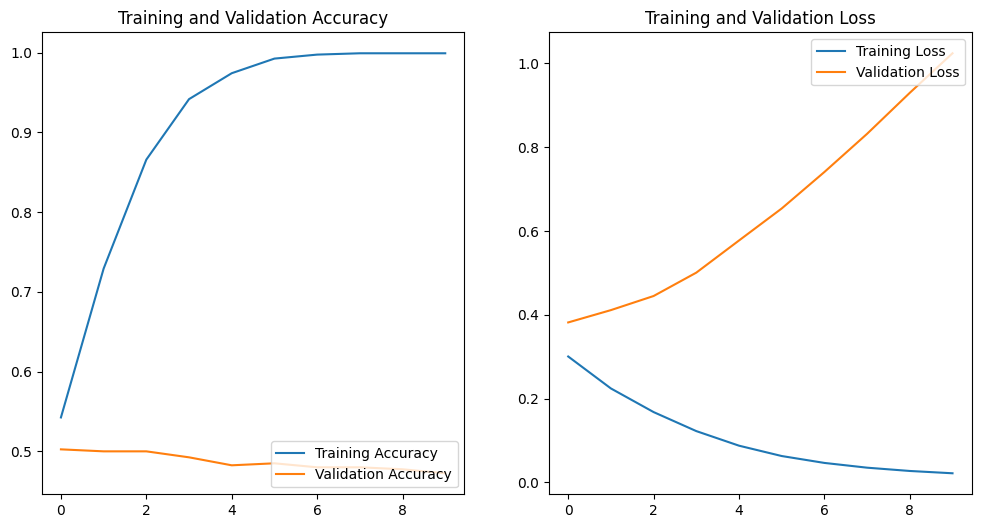

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.4308 - loss: 1.1021
Testing Loss: 1.1657533645629883, Testing Accuracy: 0.39750000834465027


In [ ]:
# Melatih model setelah fine tuning
# Melatih model dan mencatat hasil pelatihan dalam objek `history`
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=20,
    callbacks=[early_stopping]
)

# Menampilkan metrik dengan matplotlib
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluasi model pada data testing
loss, accuracy = model.evaluate(ds_test)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')